In [92]:
import qulacs
from openfermion.transforms import get_fermion_operator, jordan_wigner
from openfermion.linalg import get_sparse_operator
from openfermion.chem import MolecularData, geometry_from_pubchem
from openfermionpyscf import run_pyscf
from openfermionpsi4 import run_psi4
from scipy.optimize import minimize
from pyscf import fci
import numpy as np
# from scipy.linalg import expm
from scipy import sparse
from scipy.sparse.linalg import expm
import random
import matplotlib.pyplot as plt
!pip install pymanopt
from pymanopt.tools.multi import multiexp

In [93]:
from openfermion.ops import QubitOperator

jw_hamiltonian = (-0.143021 * QubitOperator('Z0')) + (0.104962 * QubitOperator('Z0 Z1')) + (0.038195 * QubitOperator('Z1 Z2')) + (-0.325651 * QubitOperator('Z2')) + (-0.143021 * QubitOperator('Z3')) + (0.104962 * QubitOperator('Z3 Z4')) + (0.038195 * QubitOperator('Z4 Z5')) + (-0.325651 * QubitOperator('Z5')) + (0.172191 * QubitOperator('Z1')) + (0.174763 * QubitOperator('Z0 Z1 Z2')) + (0.136055 * QubitOperator('Z0 Z2')) + (0.116134 * QubitOperator('Z0 Z3')) + (0.094064 * QubitOperator('Z0 Z3 Z4')) + (0.099152 * QubitOperator('Z0 Z4 Z5')) + (0.123367 * QubitOperator('Z0 Z5')) + (0.094064 * QubitOperator('Z0 Z1 Z3')) + (0.098003 * QubitOperator('Z0 Z1 Z3 Z4')) + (0.102525 * QubitOperator('Z0 Z1 Z4 Z5')) + (0.097795 * QubitOperator('Z0 Z1 Z5')) + (0.099152 * QubitOperator('Z1 Z2 Z3')) + (0.102525 * QubitOperator('Z1 Z2 Z3 Z4')) + (0.112045 * QubitOperator('Z1 Z2 Z4 Z5')) + (0.105708 * QubitOperator('Z1 Z2 Z5')) + (0.123367 * QubitOperator('Z2 Z3')) + (0.097795 * QubitOperator('Z2 Z3 Z4')) + (0.105708 * QubitOperator('Z2 Z4 Z5')) + (0.133557 * QubitOperator('Z2 Z5')) + (0.172191 * QubitOperator('Z4')) + (0.174763 * QubitOperator('Z3 Z4 Z5')) + (0.136055 * QubitOperator('Z3 Z5')) + (0.059110 * QubitOperator('X0 Z1')) + (-0.059110 * QubitOperator('X0')) + (0.161019 * QubitOperator('Z1 X2')) + (-0.161019 * QubitOperator('X2')) + (0.059110 * QubitOperator('X3 Z4')) + (-0.059110 * QubitOperator('X3')) + (0.161019 * QubitOperator('Z4 X5')) + (-0.161019 * QubitOperator('X5')) + (-0.038098 * QubitOperator('X0 X2')) + (-0.003300 * QubitOperator('X0 Z1 X2')) + (0.013745 * QubitOperator('X0 Z1 X3 Z4')) + (-0.013745 * QubitOperator('X0 Z1 X3')) + (-0.013745 * QubitOperator('X0 X3 Z4')) + (0.013745 * QubitOperator('X0 X3')) + (0.011986 * QubitOperator('X0 Z1 Z4 X5')) + (-0.011986 * QubitOperator('X0 Z1 X5')) + (-0.011986 * QubitOperator('X0 Z4 X5')) + (0.011986 * QubitOperator('X0 X5')) + (0.011986 * QubitOperator('Z1 X2 X3 Z4')) + (-0.011986 * QubitOperator('Z1 X2 X3')) + (-0.011986 * QubitOperator('X2 X3 Z4')) + (0.011986 * QubitOperator('X2 X3')) + (0.013836 * QubitOperator('Z1 X2 Z4 X5')) + (-0.013836 * QubitOperator('Z1 X2 X5')) + (-0.013836 * QubitOperator('X2 Z4 X5')) + (0.013836 * QubitOperator('X2 X5')) + (-0.038098 * QubitOperator('X3 X5')) + (-0.003300 * QubitOperator('X3 Z4 X5')) + (-0.002246 * QubitOperator('Z0 Z1 X2')) + (0.002246 * QubitOperator('Z0 X2')) + (0.014815 * QubitOperator('Z0 X3 Z4')) + (-0.014815 * QubitOperator('Z0 X3')) + (0.009922 * QubitOperator('Z0 Z4 X5')) + (-0.009922 * QubitOperator('Z0 X5')) + (-0.002038 * QubitOperator('Z0 Z1 X3 Z4')) + (0.002038 * QubitOperator('Z0 Z1 X3')) + (-0.007016 * QubitOperator('Z0 Z1 Z4 X5')) + (0.007016 * QubitOperator('Z0 Z1 X5')) + (-0.006154 * QubitOperator('X0 Z2')) + (0.006154 * QubitOperator('X0 Z1 Z2')) + (0.014815 * QubitOperator('X0 Z1 Z3')) + (-0.014815 * QubitOperator('X0 Z3')) + (-0.002038 * QubitOperator('X0 Z1 Z3 Z4')) + (0.002038 * QubitOperator('X0 Z3 Z4')) + (0.001124 * QubitOperator('X0 Z1 Z4 Z5')) + (-0.001124 * QubitOperator('X0 Z4 Z5')) + (0.017678 * QubitOperator('X0 Z1 Z5')) + (-0.017678 * QubitOperator('X0 Z5')) + (-0.041398 * QubitOperator('Y0 Y2')) + (0.011583 * QubitOperator('Y0 Y1 X3 X4 Z5')) + (-0.011094 * QubitOperator('Y0 Y1 X4')) + (0.010336 * QubitOperator('Y1 Y2 X3 X4 Z5')) + (-0.005725 * QubitOperator('Y1 Y2 X4')) + (-0.006154 * QubitOperator('X3 Z5')) + (0.011583 * QubitOperator('X0 X1 Z2 X3 X4 Z5')) + (-0.011094 * QubitOperator('X0 X1 Z2 X4')) + (-0.011094 * QubitOperator('X1 X3 X4 Z5')) + (0.026631 * QubitOperator('X1 X4')) + (-0.017678 * QubitOperator('Z2 X3')) + (0.011583 * QubitOperator('X0 X1 Z2 Y3 Y4')) + (0.010336 * QubitOperator('X0 X1 Z2 Y4 Y5')) + (-0.011094 * QubitOperator('X1 Y3 Y4')) + (-0.005725 * QubitOperator('X1 Y4 Y5')) + (-0.041398 * QubitOperator('Y3 Y5')) + (0.011583 * QubitOperator('Y0 Y1 Y3 Y4')) + (0.010336 * QubitOperator('Y0 Y1 Y4 Y5')) + (0.010336 * QubitOperator('Y1 Y2 Y3 Y4')) + (0.010600 * QubitOperator('Y1 Y2 Y4 Y5')) + (0.024909 * QubitOperator('X0 X1 Z2 X3 X4 X5')) + (-0.031035 * QubitOperator('X1 X3 X4 X5')) + (-0.010064 * QubitOperator('Z2 X5')) + (0.024909 * QubitOperator('X0 X1 Z2 Y3 X4 Y5')) + (-0.031035 * QubitOperator('X1 Y3 X4 Y5')) + (0.024909 * QubitOperator('Y0 Y1 X3 X4 X5')) + (0.021494 * QubitOperator('Y1 Y2 X3 X4 X5')) + (0.024909 * QubitOperator('Y0 Y1 Y3 X4 Y5')) + (0.021494 * QubitOperator('Y1 Y2 Y3 X4 Y5')) + (0.011094 * QubitOperator('X0 X1 Z2 Z3 X4 Z5')) + (-0.026631 * QubitOperator('X1 Z3 X4 Z5')) + (0.011094 * QubitOperator('Y0 Y1 Z3 X4 Z5')) + (0.005725 * QubitOperator('Y1 Y2 Z3 X4 Z5')) + (0.010336 * QubitOperator('X0 X1 Z2 Z3 X4 X5')) + (-0.005725 * QubitOperator('X1 Z3 X4 X5')) + (0.002246 * QubitOperator('Z3 X5')) + (0.010336 * QubitOperator('Y0 Y1 Z3 X4 X5')) + (0.010600 * QubitOperator('Y1 Y2 Z3 X4 X5')) + (0.024909 * QubitOperator('X0 X1 X2 X3 X4 Z5')) + (-0.031035 * QubitOperator('X0 X1 X2 X4')) + (-0.010064 * QubitOperator('X2 Z5')) + (0.024909 * QubitOperator('X0 X1 X2 Y3 Y4')) + (0.021494 * QubitOperator('X0 X1 X2 Y4 Y5')) + (0.024909 * QubitOperator('Y0 X1 Y2 X3 X4 Z5')) + (-0.031035 * QubitOperator('Y0 X1 Y2 X4')) + (0.024909 * QubitOperator('Y0 X1 Y2 Y3 Y4')) + (0.021494 * QubitOperator('Y0 X1 Y2 Y4 Y5')) + (0.063207 * QubitOperator('X0 X1 X2 X3 X4 X5')) + (0.063207 * QubitOperator('X0 X1 X2 Y3 X4 Y5')) + (0.063207 * QubitOperator('Y0 X1 Y2 X3 X4 X5')) + (0.063207 * QubitOperator('Y0 X1 Y2 Y3 X4 Y5')) + (0.031035 * QubitOperator('X0 X1 X2 Z3 X4 Z5')) + (-0.009922 * QubitOperator('X2 Z3')) + (0.031035 * QubitOperator('Y0 X1 Y2 Z3 X4 Z5')) + (0.021494 * QubitOperator('X0 X1 X2 Z3 X4 X5')) + (0.021494 * QubitOperator('Y0 X1 Y2 Z3 X4 X5')) + (0.011094 * QubitOperator('Z0 X1 Z2 X3 X4 Z5')) + (-0.026631 * QubitOperator('Z0 X1 Z2 X4')) + (0.011094 * QubitOperator('Z0 X1 Z2 Y3 Y4')) + (0.005725 * QubitOperator('Z0 X1 Z2 Y4 Y5')) + (0.031035 * QubitOperator('Z0 X1 Z2 X3 X4 X5')) + (0.031035 * QubitOperator('Z0 X1 Z2 Y3 X4 Y5')) + (0.026631 * QubitOperator('Z0 X1 Z2 Z3 X4 Z5')) + (0.005725 * QubitOperator('Z0 X1 Z2 Z3 X4 X5')) + (0.010336 * QubitOperator('Z0 X1 X2 X3 X4 Z5')) + (-0.005725 * QubitOperator('Z0 X1 X2 X4')) + (0.010336 * QubitOperator('Z0 X1 X2 Y3 Y4')) + (0.010600 * QubitOperator('Z0 X1 X2 Y4 Y5')) + (0.021494 * QubitOperator('Z0 X1 X2 X3 X4 X5')) + (0.021494 * QubitOperator('Z0 X1 X2 Y3 X4 Y5')) + (0.005725 * QubitOperator('Z0 X1 X2 Z3 X4 Z5')) + (0.010600 * QubitOperator('Z0 X1 X2 Z3 X4 X5')) + (0.001124 * QubitOperator('Z1 Z2 X3 Z4')) + (-0.001124 * QubitOperator('Z1 Z2 X3')) + (-0.007952 * QubitOperator('Z1 Z2 Z4 X5')) + (0.007952 * QubitOperator('Z1 Z2 X5')) + (0.017678 * QubitOperator('Z2 X3 Z4')) + (0.010064 * QubitOperator('Z2 Z4 X5')) + (0.009922 * QubitOperator('Z1 X2 Z3')) + (-0.007016 * QubitOperator('Z1 X2 Z3 Z4')) + (0.007016 * QubitOperator('X2 Z3 Z4')) + (-0.007952 * QubitOperator('Z1 X2 Z4 Z5')) + (0.007952 * QubitOperator('X2 Z4 Z5')) + (0.010064 * QubitOperator('Z1 X2 Z5')) + (-0.002246 * QubitOperator('Z3 Z4 X5')) + (0.006154 * QubitOperator('X3 Z4 Z5'))
n_qubit = 6

from qulacs import Observable
from qulacs.observable import create_observable_from_openfermion_text
qulacs_hamiltonian = create_observable_from_openfermion_text(str(jw_hamiltonian))

In [94]:
from qulacs import QuantumState, QuantumCircuit
from qulacs.gate import CNOT, CZ, RY, RZ, merge

depth = n_qubit * 2
cn = [1] * n_qubit
r = 0
bn = [0.1] * n_qubit
gate_set = 4

In [95]:
from qulacs.gate import DenseMatrix
def create_hamiltonian_time_evolution_gate(n_qubit, cn, gamma, Bn, t):
    I_gate = [[1,0],[0,1]]
    X_gate = [[0,1],[1,0]]
    Y_gate = [[0,0-1j],[0+1j,0]]
    Z_gate = [[1,0],[0,-1]]
    
    XX= np.array(np.zeros(2**n_qubit))
    YY= np.array(np.zeros(2**n_qubit))
    Zn= np.array(np.zeros(2**n_qubit))
    for k in range(n_qubit-1):
        for l in range(n_qubit):
            if k==l:
                if l==0:
                    hamiX = X_gate
                    hamiY = Y_gate
                else:
                    hamiX = np.kron(hamiX,X_gate)
                    hamiY = np.kron(hamiY,Y_gate)

            elif k+1==l:
                hamiX = np.kron(hamiX,X_gate)
                hamiY = np.kron(hamiY,Y_gate)
            else:
                if l==0:
                    hamiX = I_gate
                    hamiY = I_gate
                else:
                    hamiX = np.kron(hamiX,I_gate)
                    hamiY = np.kron(hamiY,I_gate)
        XX = XX+ 0.5*cn[k]*(1+gamma)*hamiX
        YY = YY+ 0.5*cn[k]*(1-gamma)*hamiY
        
    for m in range(n_qubit):
        for n in range(n_qubit):
            if m==n:
                if n==0:
                    hamiZ = Z_gate
                else:
                    hamiZ = np.kron(hamiZ,Z_gate)
            
            else:
                if n==0:
                    hamiZ = I_gate
                else:
                    hamiZ = np.kron(hamiZ,I_gate)
        
        Zn = Zn + Bn[m]*hamiZ

    hamiltonian = XX + YY + Zn
    
    ## to sparse
    hamiltonian_sparse = sparse.csr_matrix(hamiltonian)
    np.set_printoptions(threshold=10000)
    hami_gate = expm(-1j*hamiltonian_sparse*t)

#### try and error
#1. 対角化してからexp(-iHt)を計算
#2. 5qubitに作用するハミルトニアンにしてみる  => 成功
#3. 6qubitに作用するハミルトニアンにしてみる  => 急激に値が小さくなり失敗。
#     scipyのexpmの実装がcomplexが値にあるとどうもおかしくなるよう。
#     参考?： https://stackoverflow.com/questions/35486239/matrix-exponentiation-in-python
#4.  sparse matrixのオブジェクトに変換。その後sparse.expmを計算 => 成功?
#      保持する要素数が減ったことが良かった？

#     from pymanopt.tools.multi import multiexp
#     hami_gate = multiexp(-1j*np.diag(np.diag(hamiltonian))*t, sym=True)
#     print(-1j*np.diag(np.diag(hamiltonian))*t)
#     print(multiexp(-1j*np.diag(np.diag(hamiltonian))*t, sym=True))
#     import numpy.linalg as LA
#     print(hami_gate.toarray())
    
    return DenseMatrix(list(range(n_qubit)), hami_gate.toarray())

In [96]:
def create_ising_hamiltonian_time_evolution_gate(n_qubit, cn, gamma, Bn, t):
    I_gate = [[1,0],[0,1]]
    X_gate = [[0,1],[1,0]]
    Y_gate = [[0,0-1j],[0+1j,0]]
    
    XX= np.array(np.zeros(2**n_qubit))
    Y= np.array(np.zeros(2**n_qubit))
    for k in range(n_qubit-1):
        for l in range(n_qubit):
            if k==l:
                if l==0:
                    hamiX = X_gate
                else:
                    hamiX = np.kron(hamiX,X_gate)

            elif k+1==l:
                hamiX = np.kron(hamiX,X_gate)
            else:
                if l==0:
                    hamiX = I_gate
                else:
                    hamiX = np.kron(hamiX,I_gate)
        XX = XX+ 0.5*cn[k]*(1+gamma)*hamiX
        
    for m in range(n_qubit):
        for n in range(n_qubit):
            if m==n:
                if n==0:
                    hamiY = Y_gate
                else:
                    hamiY = np.kron(hamiY,Y_gate)
            
            else:
                if n==0:
                    hamiY = I_gate
                else:
                    hamiY = np.kron(hamiY,I_gate)
        
        Y = Y + hamiY

    hamiltonian = XX + Y
    hami_gate = expm(-1j*hamiltonian*t)
    
    return DenseMatrix(list(range(n_qubit)), hami_gate)

In [97]:
# def ansatz_circuit(n_qubit, depth, theta_list):
#     circuit = QuantumCircuit(n_qubit)
#     for d in range(depth):
#         for i in range(n_qubit):
#             circuit.add_gate(merge(RY(i, theta_list[2*i+2*n_qubit*d]), RZ(i, theta_list[2*i+1+2*n_qubit*d])))
#         for i in range(n_qubit//2):
#             circuit.add_gate(CZ(2*i, 2*i+1))
#         for i in range(n_qubit//2-1):
#             circuit.add_gate(CZ(2*i+1, 2*i+2))
#     for i in range(n_qubit):
#         circuit.add_gate(merge(RY(i, theta_list[2*i+2*n_qubit*depth]), RZ(i, theta_list[2*i+1+2*n_qubit*depth])))

#     return circuit


#### ansatz of XY model
def ansatz_circuit(n_qubit, depth, theta_list):
    circuit = QuantumCircuit(n_qubit)
    for d in range(depth):
        circuit.add_gate(CNOT(0, 1))
        circuit.add_gate(merge(RY(0, theta_list[gate_set*d+1]), RZ(0, theta_list[gate_set*d+2])))
        circuit.add_gate(merge(RY(1, theta_list[gate_set*d+3]), RZ(1, theta_list[gate_set*d+4])))
        circuit.add_gate(create_hamiltonian_time_evolution_gate(n_qubit, cn, r, bn, theta_list[0]))

    return circuit

##### ansatz of transversal ising model
# def ansatz_circuit(n_qubit, depth, theta_list):
#     circuit = QuantumCircuit(n_qubit)
#     for d in range(depth):
#         circuit.add_gate(CNOT(0, 1))
#         circuit.add_gate(merge(RY(0, theta_list[gate_set*d+1]), RZ(0, theta_list[gate_set*d+2])))
#         circuit.add_gate(merge(RY(1, theta_list[gate_set*d+3]), RZ(1, theta_list[gate_set*d+4])))
#         circuit.add_gate(create_ising_hamiltonian_time_evolution_gate(n_qubit, cn, r, bn, 1))

#     return circuit

In [98]:
def cost(theta_list):
    state = QuantumState(n_qubit) #|00000> を準備
    circuit = ansatz_circuit(n_qubit, depth, theta_list) #量子回路を構成
    circuit.update_quantum_state(state) #量子回路を状態に作用
    return qulacs_hamiltonian.get_expectation_value(state) #ハミルトニアンの期待値を計算

In [99]:
cost_history = []
t = np.array([random.uniform(0.0,10.0)])
init_random_list = np.append(t, np.random.random(2*n_qubit*(depth+1))*1e-1)
# init_random_list = np.random.random(2*n_qubit*(depth+1))*1e-1
cost_history.append(cost(init_random_list))
method = "BFGS"
options = {"disp": True, "maxiter": 50, "gtol": 1e-600}
opt = minimize(cost, init_random_list,
               method=method,
               callback=lambda x: cost_history.append(cost(x)))
print(cost_history)

[0.7645305728672148, -0.5316470448013927, -1.0653398647235337, -1.423853868662241, -1.7351657809304672, -1.8728075459906082, -1.903976710920004, -1.9156962792622494, -1.921035464800888, -1.923318953293036, -1.9257884394303186, -1.9267762846188388, -1.9270041850250093, -1.927073780541254, -1.9271762388214786, -1.9272510716004452, -1.9273251493801653, -1.9274076132119984, -1.927475789848724, -1.9275158110060695, -1.9275696003150065, -1.9276482063564664, -1.927677006893235, -1.9277274719449402, -1.9277973629742409, -1.927853642101686, -1.9279210787188723, -1.9279948119828032, -1.9280872228984, -1.9281254399372263, -1.9281847889516983, -1.9282542341326052, -1.9283166652734607, -1.9284210641021484, -1.92852989242194, -1.9285559399040442, -1.9286041571131032, -1.9286891338577585, -1.9287320162109416, -1.9288061925469102, -1.928901584202297, -1.9289314044516719, -1.9289740733873952, -1.928995434151203, -1.9290324360612179, -1.9290850715074552, -1.9291094489878817, -1.9291210404438672, -1.9291

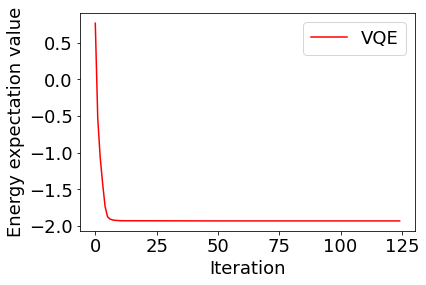

In [100]:
plt.rcParams["font.size"] = 18
plt.plot(cost_history, color="red", label="VQE")
# plt.plot(range(len(cost_history)), [molecule.fci_energy]*len(cost_history), linestyle="dashed", color="black", label="Exact Solution")
plt.xlabel("Iteration")
plt.ylabel("Energy expectation value")
plt.legend()
plt.show()

In [51]:
A = np.array([[0.5+0.j,0.5+0.j],[0.5+0.j,-0.5+0.j]])
from scipy.sparse.linalg import expm as e
Aexp = expm(A)
# hami_gate = expm(-1j*A*1.0)
print(Aexp)

[[1.80331266+0.j 0.54272082+0.j]
 [0.54272082+0.j 0.71787102+0.j]]
